In [1]:
import cv2   
import tensorflow as tf
import math  
import matplotlib.pyplot as plt    
%matplotlib inline
import pandas as pd
from keras.preprocessing import image   # for preprocessing the images
import numpy as np    
from skimage.transform import resize

In [2]:
count = 0
videoFile = r"D:\Datasets\bat_vs_sperman.mp4"
extraction_path=r"D:\Datasets\supr_vs_bat_frames"
cap = cv2.VideoCapture(videoFile)   # capturing the video from the given path
frameRate = cap.get(5) #frame rate
x=1
while(cap.isOpened()):
    frameId = cap.get(1) #current frame number
    ret, frame = cap.read()
    if (ret != True):
        break
    if (frameId % math.floor(frameRate) == 0):
        filename =extraction_path+"\\frame%d.jpg" % count
        count+=1
        cv2.imwrite(filename, frame)
cap.release()
print ("Done")

Done


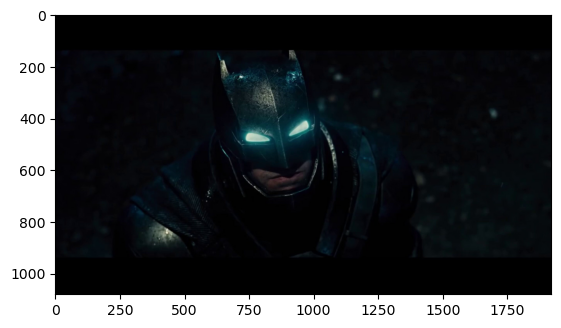

In [3]:
img = plt.imread(r"D:\Datasets\supr_vs_bat_frames\frame0.jpg")   # reading image using its name
plt.imshow(img)

In [4]:
# 1 for batman 
# 2 for superman
# 0 for both batman and superman
import pandas as pd

data = [['frame0.jpg', 1],
      ['frame1.jpg', 1],
      ['frame2.jpg', 1],
      ['frame3.jpg', 1],
      ['frame4.jpg', 1],
      ['frame5.jpg', 1],
      ['frame6.jpg', 0],
      ['frame7.jpg', 1],
      ['frame8.jpg', 0],
      ['frame9.jpg', 2],
      ['frame10.jpg',1],
      ['frame11.jpg', 1],
      ['frame12.jpg', 0],
      ['frame13.jpg', 0],
      ['frame14.jpg', 1],
      ['frame15.jpg', 1],
      ['frame16.jpg', 1],
      ['frame17.jpg', 1],
      ['frame18.jpg', 1],
      ['frame19.jpg', 2],
      ['frame20.jpg', 2],
      ['frame21.jpg', 1],
      ['frame22.jpg', 1],
      ['frame23.jpg', 1],
      ['frame24.jpg', 2],
      ['frame25.jpg', 2],
      ['frame26.jpg', 1],
      ['frame27.jpg', 1],
      ['frame28.jpg', 2],
      ['frame29.jpg', 2],
      ['frame30.jpg', 2],
      ['frame31.jpg', 1],
      ['frame32.jpg', 1],
      ['frame33.jpg', 2],
      ['frame34.jpg', 2],
      ['frame35.jpg', 2],
       ['frame36.jpg', 1],
       ['frame37.jpg', 1],
       ['frame38.jpg', 0],
       ['frame39.jpg', 0],
       ['frame40.jpg', 0],
       ['frame41.jpg',0],
       ['frame42.jpg', 0],
       ['frame43.jpg',0],
       ['frame44.jpg', 0],
       ['frame45.jpg', 0],
       ['frame46.jpg', 0],
       ['frame47.jpg', 0],
       ['frame48.jpg', 0],
       ['frame49.jpg', 0],
       ['frame50.jpg', 0]]

data = pd.DataFrame(data, columns=['Image_ID', 'Class'])

# Change the value of the class for frame1 to 0
data.loc[data['Image_ID'] == 'frame1', 'Class'] = 0

data.head()

,Image_ID,Class
0,frame0.jpg,1
1,frame1.jpg,1
2,frame2.jpg,1
3,frame3.jpg,1
4,frame4.jpg,1


In [5]:
# read the images based on names( the Image_ID column )
X = [ ]     # creating an empty array
for img_name in data.Image_ID:
    img = plt.imread(r'D:\Datasets\supr_vs_bat_frames/' + img_name)
    X.append(img)  # storing each image in array X
X = np.array(X)

In [6]:
# two things to train the model:
# Training images, and
# Their corresponding class

from tensorflow.keras.utils import to_categorical
y = data.Class
dummy_y = to_categorical(y)

In [7]:
image = []
for i in range(0,X.shape[0]):
    a = resize(X[i], preserve_range=True, output_shape=(224,224)).astype(int)      # reshaping to 224*224*3
    image.append(a)                                                                # 3 -  means RGB channels 
X = np.array(image)

In [8]:
# size after reshapping
X[0].shape

(224, 224, 3)

In [9]:
from keras.applications.vgg16 import preprocess_input
# VGG16 pretrained model which takes an input image of shape (224 X 224 X 3)
X = preprocess_input(X)      # preprocessing the input data

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size=0.3, random_state=42)   
# preparing the validation set, randomly divide images into training and validation set.

In [11]:
from keras.models import Sequential
from keras.applications.vgg16 import VGG16
from keras.layers import Dense, InputLayer, Dropout

In [12]:
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))    
# include_top=False to remove the top layer

In [13]:
X_train = base_model.predict(X_train)
X_test = base_model.predict(X_test)
X_train.shape, X_test.shape

1/1 [==============================] - 2s 2s/step


((35, 7, 7, 512), (16, 7, 7, 512))

In [15]:
# Reshape the feature maps to 1-D arrays
X_train = X_train.reshape(35, 7*7*512)    # 35 for training  ,  converting to 1-D
X_test = X_test.reshape(16, 7*7*512)     # 16 for testing

In [16]:
train = X_train/X_train.max()      # centering the data
X_test = X_test/X_train.max()

In [34]:
# i. Building the model
model = Sequential()
model.add(InputLayer((7*7*512,)))    # input layer
model.add(Dense(units=1024, activation='sigmoid')) # hidden layer
model.add(Dense(3, activation='softmax'))    # output layer

In [35]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1024)              25691136  
                                                                 
 dense_5 (Dense)             (None, 3)                 3075      
                                                                 
Total params: 25694211 (98.02 MB)
Trainable params: 25694211 (98.02 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [36]:
#  Compiling the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


In [37]:
# Training the model
result=model.fit(train, y_train, epochs=100, validation_data=(X_test, y_test))

Epoch 1/100
2/2 [==============================] - 1s 755ms/step - loss: 1.1100 - accuracy: 0.3429 - val_loss: 1.8918 - val_accuracy: 0.3125
Epoch 2/100
2/2 [==============================] - 1s 312ms/step - loss: 1.0499 - accuracy: 0.5143 - val_loss: 1.2778 - val_accuracy: 0.4375
Epoch 3/100
2/2 [==============================] - 1s 313ms/step - loss: 0.4909 - accuracy: 0.7714 - val_loss: 0.5890 - val_accuracy: 0.7500
Epoch 4/100
2/2 [==============================] - 1s 275ms/step - loss: 0.2002 - accuracy: 1.0000 - val_loss: 0.4088 - val_accuracy: 0.8750
Epoch 5/100
2/2 [==============================] - 1s 302ms/step - loss: 0.2535 - accuracy: 0.9143 - val_loss: 0.3805 - val_accuracy: 0.8125
Epoch 6/100
2/2 [==============================] - 1s 305ms/step - loss: 0.2306 - accuracy: 0.9143 - val_loss: 0.4116 - val_accuracy: 0.8125
Epoch 7/100
2/2 [==============================] - 1s 273ms/step - loss: 0.1168 - accuracy: 1.0000 - val_loss: 0.5645 - val_accuracy: 0.8125
Epoch 8/100
2

Epoch 59/100
2/2 [==============================] - 1s 299ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1853 - val_accuracy: 0.7500
Epoch 60/100
2/2 [==============================] - 1s 280ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1847 - val_accuracy: 0.7500
Epoch 61/100
2/2 [==============================] - 1s 261ms/step - loss: 0.0017 - accuracy: 1.0000 - val_loss: 1.1841 - val_accuracy: 0.7500
Epoch 62/100
2/2 [==============================] - 0s 266ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1853 - val_accuracy: 0.7500
Epoch 63/100
2/2 [==============================] - 1s 261ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1877 - val_accuracy: 0.7500
Epoch 64/100
2/2 [==============================] - 1s 274ms/step - loss: 0.0016 - accuracy: 1.0000 - val_loss: 1.1893 - val_accuracy: 0.7500
Epoch 65/100
2/2 [==============================] - 1s 323ms/step - loss: 0.0015 - accuracy: 1.0000 - val_loss: 1.1910 - val_accuracy: 0.7500
Epoch 

In [25]:
model.save('trained_model_for_batman_vs_superman')

INFO:tensorflow:Assets written to: trained_model_for_batman_vs_superman\assets


INFO:tensorflow:Assets written to: trained_model_for_batman_vs_superman\assets


In [38]:
model.save('trained_batman_vs_superman.h5')

D:\Anaconda\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [41]:
from keras.models import load_model
loaded_model = load_model('trained_batman_vs_superman.h5')


In [43]:
from keras.preprocessing import image
import numpy as np

# Load and preprocess the image
img_path = r"D:\Datasets\supr_vs_bat_frames\frame0.jpg"
img = image.load_img(img_path, target_size=(224, 224))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array = preprocess_input(img_array)  # Preprocess using VGG16's preprocess_input


In [63]:
# Resize the image using the provided code
img_array_resized = resize(img_array[0], preserve_range=True, output_shape=(7,7,512)).astype(int)
# Flatten the resized image array
img_array_flattened = img_array_resized.reshape(1, -1)

In [66]:
# Make prediction
prediction = loaded_model.predict(img_array_flattened)
if predicted_class==2:
    print("Superman")
elif predicted_class==1:
    print("batman")
elif predicted_class==0:
    print("Both superman and batman in same frame")

1/1 [==============================] - 0s 42ms/step
batman
